In [54]:
import pandas as pd
import os

def extract_nodes_from_directory(directory_path):
    dataframes = {}  # Dictionary to store DataFrames with descriptive keys

    # List all .txt files in the given directory
    txt_files = [f for f in os.listdir(directory_path) if f.endswith('.txt')]

    for txt_file in txt_files:
        file_path = os.path.join(directory_path, txt_file)
        data = []  # List to store node dictionaries for the current file

        with open(file_path, 'r') as file:
            lines = file.readlines()

            # Loop through each line to extract node data
            for line in lines:
                if 'nodecharts pie' in line:
                    # Extract node name
                    node_name = line.split('nodelist="')[1].split('"')[0]

                    # Extract labels and values
                    labels = line.split('labellist="')[1].split('"')[0].split(',')
                    values = line.split('valuelist="')[1].split('"')[0].split(',')

                    # Create a dictionary for this node's labels and values
                    label_value_dict = {label: float(value) for label, value in zip(labels, values)}

                    # Store the node's name and label-value dictionary
                    data.append({"node_name": node_name, "label_values": label_value_dict})

        # Create a DataFrame from the extracted data for the current file
        df = pd.DataFrame(data)
        
        # Generate a descriptive key for the dictionary
        key_name = txt_file.replace(".txt", "_dataframe")
        dataframes[key_name] = df

    return dataframes

# Example usage
directory_path = "/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/PST_comparisons/USA5326"
dataframes = extract_nodes_from_directory(directory_path)

# Display all available keys (DataFrame names)
print("Available DataFrames:", dataframes.keys())

# Example: Print the data for a specific DataFrame
file_key = "USA5326_post_cytoscape_output_tree_script_dataframe"  # Adjust based on actual key
if file_key in dataframes:
    print(f"Data for {file_key}:")
    print(dataframes[file_key])
else:
    print(f"{file_key} not found.")


def list_all_node_names(dataframes):
    """
    Function to create a list of all unique node names across all DataFrames.
    """
    all_node_names = set()  # Using a set to avoid duplicates

    for df_name, df in dataframes.items():
        if 'node_name' in df.columns:
            node_names = df['node_name'].unique()
            all_node_names.update(node_names)

    return list(all_node_names)

# Example usage
node_names_list = list_all_node_names(dataframes)
print("List of all unique node names across all DataFrames:")
print(node_names_list)


Available DataFrames: dict_keys(['USA5326_post_cytoscape_output_tree_script_dataframe', 'USA5326_late_cytoscape_output_tree_script_dataframe', 'USA5326_early_cytoscape_output_tree_script_dataframe'])
Data for USA5326_post_cytoscape_output_tree_script_dataframe:
   node_name                                       label_values
0    epsilon  {'A': 0.0139204, 'B': 0.00823291, 'C': 0.03690...
1          A  {'A': 0.00657895, 'B': 0.0164474, 'C': 0.05263...
2          B  {'A': 0.0670732, 'C': 0.0731707, 'D': 0.128049...
3          C  {'A': 0.0416667, 'B': 0.0387931, 'C': 0.127874...
4          D  {'A': 0.0514096, 'B': 0.013267, 'C': 0.348259,...
5          E  {'A': 0.0471698, 'B': 0.00471698, 'C': 0.00943...
6          G  {'A': 0.143836, 'B': 0.00342466, 'C': 0.023972...
7          I  {'A': 0.00353357, 'B': 0.00176678, 'C': 0.0035...
8          J  {'C': 0.004, 'E': 0.016, 'F': 0.012, 'I': 0.00...
9          K  {'E': 0.0283333, 'F': 0.00166667, 'G': 0.005, ...
10         L  {'A': 0.00674536, 'D

In [55]:
import pandas as pd
import numpy as np

# Extracting the DataFrames from the dictionary using the keys
early_df = dataframes.get('USA5326_early_cytoscape_output_tree_script_dataframe')
late_df = dataframes.get('USA5326_late_cytoscape_output_tree_script_dataframe')
post_df = dataframes.get('USA5326_post_cytoscape_output_tree_script_dataframe')

def calculate_distance_between_dfs(df1, df2, node_name, df1_label, df2_label):
    """
    Function to calculate the Euclidean distance between a specific node in two DataFrames.
    Outputs which DataFrames are being compared before calculating the distance.
    """
    print(f"Comparing node '{node_name}' between {df1_label} and {df2_label} DataFrames.")
    
    df1_node_row = df1.loc[df1['node_name'] == node_name]
    df2_node_row = df2.loc[df2['node_name'] == node_name]
    
    if not df1_node_row.empty and not df2_node_row.empty:
        # Extract label_values if the node is found in both DataFrames
        df1_node = df1_node_row['label_values'].values[0]
        df2_node = df2_node_row['label_values'].values[0]

        # Ensure both dictionaries have the same keys, filling missing keys with 0
        all_labels = set(df1_node.keys()).union(set(df2_node.keys()))

        df1_values = np.array([df1_node.get(label, 0) for label in all_labels])
        df2_values = np.array([df2_node.get(label, 0) for label in all_labels])

        # Calculate the Euclidean distance
        euclidean_distance = np.linalg.norm(df1_values - df2_values)
        print(f"Euclidean distance between '{node_name}' node probabilities: {euclidean_distance}")
        return euclidean_distance

    else:
        # Handle the case where the node is missing from one or both DataFrames
        if df1_node_row.empty and df2_node_row.empty:
            print(f"'{node_name}' node is missing from both {df1_label} and {df2_label}. Assigning a distance of 0.")
            return 0
        elif df1_node_row.empty:
            print(f"'{node_name}' node is missing from {df1_label}. Assigning a distance of 1.")
            return 1
        elif df2_node_row.empty:
            print(f"'{node_name}' node is missing from {df2_label}. Assigning a distance of 1.")
            return 1

# Calculate distance between node 'R' in the early and late DataFrames
if early_df is not None and late_df is not None:
    early_late_distance = calculate_distance_between_dfs(early_df, late_df, 'J', 'early', 'late')
else:
    print("Early or Late DataFrame not found.")

# Calculate distance between node 'R' in the late and post DataFrames
if late_df is not None and post_df is not None:
    late_post_distance = calculate_distance_between_dfs(late_df, post_df, 'J', 'late', 'post')
else:
    print("Late or Post DataFrame not found.")


Comparing node 'J' between early and late DataFrames.
Euclidean distance between 'J' node probabilities: 0.12635965562117407
Comparing node 'J' between late and post DataFrames.
Euclidean distance between 'J' node probabilities: 0.1340049675033355


In [56]:
import pandas as pd
import numpy as np

# Extracting the DataFrames from the dictionary using the keys
early_df = dataframes.get('USA5326_early_cytoscape_output_tree_script_dataframe')
late_df = dataframes.get('USA5326_late_cytoscape_output_tree_script_dataframe')
post_df = dataframes.get('USA5326_post_cytoscape_output_tree_script_dataframe')

def calculate_distance_between_dfs(df1, df2, node_name, df1_label, df2_label):
    """
    Function to calculate the Euclidean distance between a specific node in two DataFrames.
    Outputs which DataFrames are being compared before calculating the distance.
    """
    print(f"Comparing node '{node_name}' between {df1_label} and {df2_label} DataFrames.")
    
    df1_node_row = df1.loc[df1['node_name'] == node_name]
    df2_node_row = df2.loc[df2['node_name'] == node_name]
    
    if not df1_node_row.empty and not df2_node_row.empty:
        # Extract label_values if the node is found in both DataFrames
        df1_node = df1_node_row['label_values'].values[0]
        df2_node = df2_node_row['label_values'].values[0]

        # Ensure both dictionaries have the same keys, filling missing keys with 0
        all_labels = set(df1_node.keys()).union(set(df2_node.keys()))

        df1_values = np.array([df1_node.get(label, 0) for label in all_labels])
        df2_values = np.array([df2_node.get(label, 0) for label in all_labels])

        # Calculate the Euclidean distance
        euclidean_distance = np.linalg.norm(df1_values - df2_values)
        print(f"Euclidean distance between '{node_name}' node probabilities: {euclidean_distance}")
        return euclidean_distance

    else:
        # Handle the case where the node is missing from one or both DataFrames
        if df1_node_row.empty and df2_node_row.empty:
            print(f"'{node_name}' node is missing from both {df1_label} and {df2_label}. Assigning a distance of 0.")
            return 0
        elif df1_node_row.empty:
            print(f"'{node_name}' node is missing from {df1_label}. Assigning a distance of 1.")
            return 1
        elif df2_node_row.empty:
            print(f"'{node_name}' node is missing from {df2_label}. Assigning a distance of 1.")
            return 1

def list_all_node_names(dataframes):
    """
    Function to create a list of all unique node names across all DataFrames.
    """
    all_node_names = set()  # Using a set to avoid duplicates

    for df_name, df in dataframes.items():
        if 'node_name' in df.columns:
            node_names = df['node_name'].unique()
            all_node_names.update(node_names)

    return list(all_node_names)

# Example usage:
node_names_list = list_all_node_names(dataframes)
print("List of all unique node names across all DataFrames:")
print(node_names_list)

# Calculate the Euclidean distances for all nodes in all comparisons
if early_df is not None and late_df is not None:
    for node in node_names_list:
        calculate_distance_between_dfs(early_df, late_df, node, 'early', 'late')
else:
    print("Early or Late DataFrame not found.")

if late_df is not None and post_df is not None:
    for node in node_names_list:
        calculate_distance_between_dfs(late_df, post_df, node, 'late', 'post')
else:
    print("Late or Post DataFrame not found.")


List of all unique node names across all DataFrames:
['W', 'PV', 'TZ', 'R', 'Q', 'aC', 'dU', 'db', 'bd', 'g', 'K', 'aV', 'U', 'L', 'S', 'P', 'A', 'bW', 'DC', 'V', 'Pa', 'Z', 'LE', 'aP', 'T', 'SZ', 'cd', 'cbW', 'd', 'Gh', 'J', 'ZT', 'X', 'i', 'C', 'j', 'c', 'h', 'Ud', 'ZS', 'epsilon', 'M', 'H', 'E', 'N', 'O', 'B', 'G', 'D', 'a', 'F', 'ag', 'I', 'cb', 'b', 'ad', 'VP', 'Wb']
Comparing node 'W' between early and late DataFrames.
Euclidean distance between 'W' node probabilities: 0.07940943195087595
Comparing node 'PV' between early and late DataFrames.
'PV' node is missing from both early and late. Assigning a distance of 0.
Comparing node 'TZ' between early and late DataFrames.
'TZ' node is missing from both early and late. Assigning a distance of 0.
Comparing node 'R' between early and late DataFrames.
'R' node is missing from early. Assigning a distance of 1.
Comparing node 'Q' between early and late DataFrames.
Euclidean distance between 'Q' node probabilities: 0.10543491997212498
Comp

In [44]:
import pandas as pd
import numpy as np

# Extracting the DataFrames from the dictionary using the keys
early_df = dataframes.get('USA5283_early_cytoscape_output_tree_script_dataframe')
late_df = dataframes.get('USA5283_late_cytoscape_output_tree_script_dataframe')
post_df = dataframes.get('USA5283_post_cytoscape_output_tree_script_dataframe')

def calculate_distance_between_dfs(df1, df2, node_name, df1_label, df2_label):
    """
    Function to calculate the Euclidean distance between a specific node in two DataFrames.
    """
    df1_node_row = df1.loc[df1['node_name'] == node_name]
    df2_node_row = df2.loc[df2['node_name'] == node_name]
    
    if not df1_node_row.empty and not df2_node_row.empty:
        # Extract label_values if the node is found in both DataFrames
        df1_node = df1_node_row['label_values'].values[0]
        df2_node = df2_node_row['label_values'].values[0]

        # Ensure both dictionaries have the same keys, filling missing keys with 0
        all_labels = set(df1_node.keys()).union(set(df2_node.keys()))

        df1_values = np.array([df1_node.get(label, 0) for label in all_labels])
        df2_values = np.array([df2_node.get(label, 0) for label in all_labels])

        # Calculate the Euclidean distance
        euclidean_distance = np.linalg.norm(df1_values - df2_values)
        return euclidean_distance

    else:
        # Handle the case where the node is missing from one or both DataFrames
        if df1_node_row.empty and df2_node_row.empty:
            return 0  # Node missing from both DataFrames
        elif df1_node_row.empty:
            return 1  # Node missing from the first DataFrame
        elif df2_node_row.empty:
            return 1  # Node missing from the second DataFrame

def list_all_node_names(dataframes):
    """
    Function to create a list of all unique node names across all DataFrames.
    """
    all_node_names = set()  # Using a set to avoid duplicates

    for df_name, df in dataframes.items():
        if 'node_name' in df.columns:
            node_names = df['node_name'].unique()
            all_node_names.update(node_names)

    return list(all_node_names)

# Example usage:
node_names_list = list_all_node_names(dataframes)

# Dictionary to store distances with node names as keys
distance_data = {
    'node_name': [],
    'early_vs_late': [],
    'late_vs_post': []
}

# Calculate the Euclidean distances for all nodes in all comparisons
for node in node_names_list:
    # Calculate distance between early and late
    if early_df is not None and late_df is not None:
        early_late_distance = calculate_distance_between_dfs(early_df, late_df, node, 'early', 'late')
    else:
        early_late_distance = None

    # Calculate distance between late and post
    if late_df is not None and post_df is not None:
        late_post_distance = calculate_distance_between_dfs(late_df, post_df, node, 'late', 'post')
    else:
        late_post_distance = None

    # Add results to the dictionary
    distance_data['node_name'].append(node)
    distance_data['early_vs_late'].append(early_late_distance)
    distance_data['late_vs_post'].append(late_post_distance)

# Convert the dictionary to a pandas DataFrame
distance_df = pd.DataFrame(distance_data)

# Display the table
print(distance_df)


   node_name  early_vs_late  late_vs_post
0          W       0.070973      0.140345
1         Uh       0.148095      0.347844
2         dh       0.133697      1.000000
3          Q       0.083075      0.265592
4        PZG       0.000000      1.000000
..       ...            ...           ...
63       fZG       0.000000      1.000000
64       ZGH       0.000000      1.000000
65        bP       0.118472      1.000000
66         b       0.073449      0.073171
67        Zd       0.159115      1.000000

[68 rows x 3 columns]


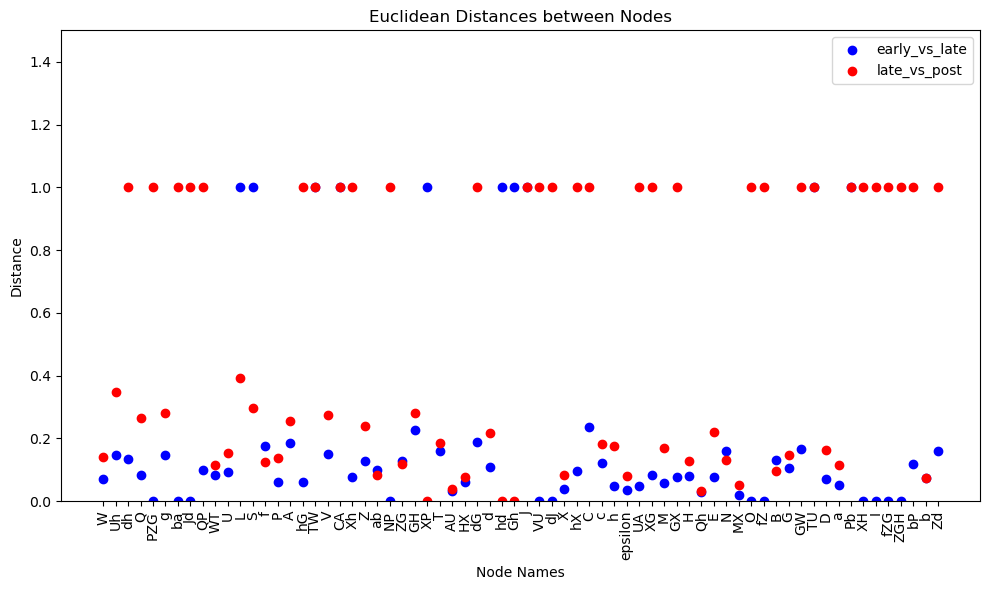

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the DataFrame 'distance_df' is already created as shown before

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot early_vs_late distances
plt.scatter(distance_df['node_name'], distance_df['early_vs_late'], color='blue', label='early_vs_late')

# Plot late_vs_post distances
plt.scatter(distance_df['node_name'], distance_df['late_vs_post'], color='red', label='late_vs_post')

# Add labels and title
plt.xlabel('Node Names')
plt.ylabel('Distance')
plt.title('Euclidean Distances between Nodes')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend()
plt.ylim(0, 1.5)

# Show the plot
plt.tight_layout()
plt.show()


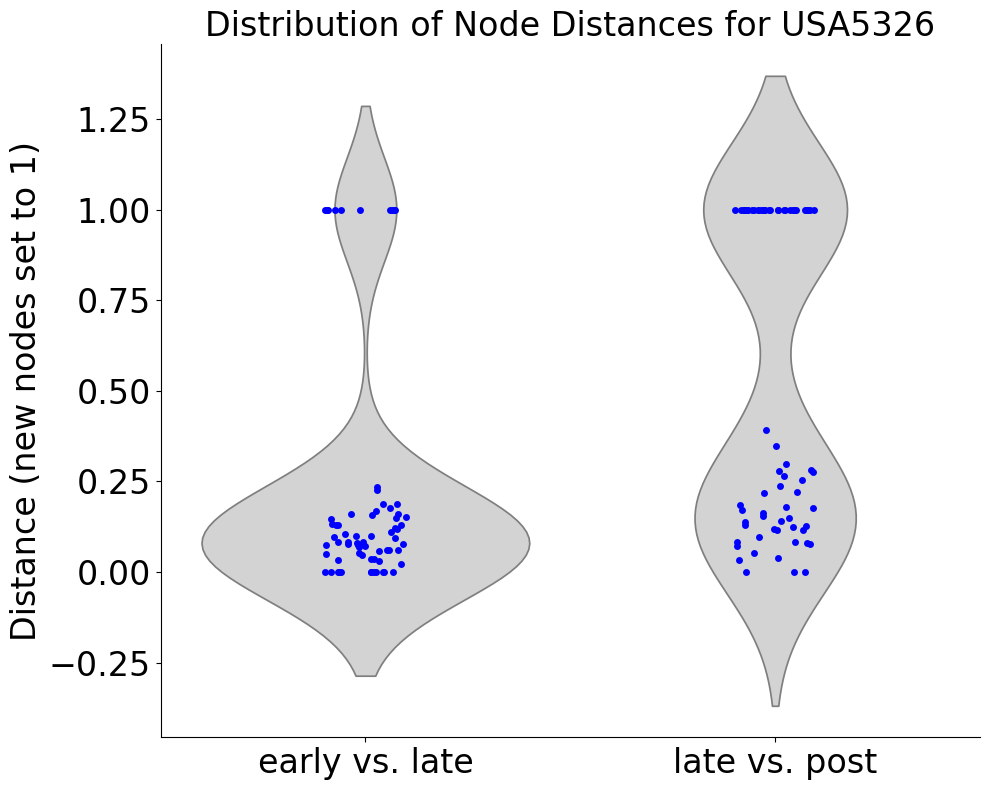

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame 'distance_df' is already created as shown before

# Extracting the animal ID from the first part of the DataFrame key
animal_id = list(dataframes.keys())[0].split('_')[0]  # Extracts 'USA5288'

# Prepare the data for the violin plot
distance_data_melted = pd.melt(distance_df, id_vars='node_name', value_vars=['early_vs_late', 'late_vs_post'],
                               var_name='Comparison', value_name='Distance')

# Modify the xtick labels to remove underscores and add a period after 'vs'
distance_data_melted['Comparison'] = distance_data_melted['Comparison'].str.replace('_vs_', ' vs. ')

# Create the violin plot with lighter grey color
plt.figure(figsize=(10, 8))  # Adjusted figure size for readability
sns.violinplot(x='Comparison', y='Distance', data=distance_data_melted, inner=None, color='#d3d3d3')  # Light grey

# Add jittered scatter points to the plot
sns.stripplot(x='Comparison', y='Distance', data=distance_data_melted, color='blue', jitter=True, size=5)

# Add labels and title with increased fontsize
plt.ylabel('Distance (new nodes set to 1)', fontsize=24)
plt.title(f'Distribution of Node Distances for {animal_id}', fontsize=24)

# Customize tick label font sizes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Remove the x-axis label
plt.xlabel('')

# Remove the top and right spines (lines)
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming the DataFrame 'distance_df' is already created as shown before

# # Extracting the animal ID from the first part of the DataFrame key
# animal_id = list(dataframes.keys())[0].split('_')[0]  # Extracts 'USA5288'

# # Prepare the data for the violin plot
# distance_data_melted = pd.melt(distance_df, id_vars='node_name', value_vars=['early_vs_late', 'late_vs_post'],
#                                var_name='Comparison', value_name='Distance')

# # Modify the xtick labels to remove underscores and add a period after 'vs'
# distance_data_melted['Comparison'] = distance_data_melted['Comparison'].str.replace('_vs_', ' vs. ')

# # Create the violin plot with lighter grey color
# plt.figure(figsize=(10, 8))  # Adjusted figure size for readability
# sns.violinplot(x='Comparison', y='Distance', data=distance_data_melted, inner=None, color='#d3d3d3')  # Light grey

# # Add jittered scatter points to the plot
# sns.stripplot(x='Comparison', y='Distance', data=distance_data_melted, color='blue', jitter=True, size=5)

# # Calculate medians and quartiles for each comparison group
# grouped = distance_data_melted.groupby('Comparison')['Distance']
# medians = grouped.median()
# q1 = grouped.quantile(0.25)
# q3 = grouped.quantile(0.75)

# # Add vertical lines for median and quartiles for each comparison
# for i, comparison in enumerate(medians.index):
#     x_coord = i  # position for each category on the x-axis
#     plt.vlines(x=x_coord, ymin=q1[comparison], ymax=q3[comparison], color='black', linestyle='-', lw=4)  # Box line (quartiles)
#     plt.scatter(x_coord, medians[comparison], color='red', zorder=10, s=100, label=f'Median' if i == 0 else "")  # Median point
#     plt.vlines(x=x_coord, ymin=distance_data_melted[distance_data_melted['Comparison'] == comparison]['Distance'].min(),
#                ymax=distance_data_melted[distance_data_melted['Comparison'] == comparison]['Distance'].max(),
#                color='black', linestyle='-', lw=2)  # Whisker lines

# # Add labels and title with increased fontsize
# plt.ylabel('Distance (new nodes set to 1)', fontsize=24)
# plt.title(f'Distribution of Node Distances for {animal_id}', fontsize=24)

# # Customize tick label font sizes
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)

# # Remove the x-axis label
# plt.xlabel('')

# # Remove the top and right spines (lines)
# sns.despine(top=True, right=True)

# # Add legend to show the median point
# plt.legend()

# # Show the plot
# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming the DataFrame 'distance_df' is already created as shown before

# # Extracting the animal ID from the first part of the DataFrame key
# animal_id = list(dataframes.keys())[0].split('_')[0]  # Extracts 'USA5288'

# # Prepare the data for the boxplot
# distance_data_melted = pd.melt(distance_df, id_vars='node_name', value_vars=['early_vs_late', 'late_vs_post'],
#                                var_name='Comparison', value_name='Distance')

# # Modify the xtick labels to remove underscores and add a period after 'vs'
# distance_data_melted['Comparison'] = distance_data_melted['Comparison'].str.replace('_vs_', ' vs. ')

# # Set figure size to (10, 8) but make the boxplots narrower
# plt.figure(figsize=(10, 8))  # Keep the overall figure size

# # Create the boxplot with narrower boxes by adjusting the 'width'
# sns.boxplot(x='Comparison', y='Distance', data=distance_data_melted, color='#d3d3d3', fliersize=0, width=0.3)  # Boxplot with narrower width

# # Add jittered scatter points to the plot
# sns.stripplot(x='Comparison', y='Distance', data=distance_data_melted, color='blue', jitter=True, size=5)

# # Add labels and title with increased fontsize
# plt.ylabel('Distance (new nodes set to 1)', fontsize=24)
# plt.title(f'Distribution of Node Distances for {animal_id}', fontsize=24)

# # Customize tick label font sizes
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)

# # Remove the x-axis label
# plt.xlabel('')

# # Remove the top and right spines (lines)
# sns.despine(top=True, right=True)

# # Show the plot
# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.patches as mpatches

# # Assuming the DataFrame 'distance_df' is already created as shown before

# # Extracting the animal ID from the first part of the DataFrame key
# animal_id = list(dataframes.keys())[0].split('_')[0]  # Extracts 'USA5288'

# # Prepare the data for the boxplot
# distance_data_melted = pd.melt(distance_df, id_vars='node_name', value_vars=['early_vs_late', 'late_vs_post'],
#                                var_name='Comparison', value_name='Distance')

# # Modify the xtick labels to remove underscores and add a period after 'vs'
# distance_data_melted['Comparison'] = distance_data_melted['Comparison'].str.replace('_vs_', ' vs. ')

# # Set figure size to (10, 8) but make the boxplots narrower
# plt.figure(figsize=(10, 8))  # Keep the overall figure size

# # Create the boxplot with narrower boxes by adjusting the 'width'
# sns.boxplot(x='Comparison', y='Distance', data=distance_data_melted, color='#d3d3d3', fliersize=0, width=0.3)  # Boxplot with narrower width

# # Add jittered scatter points to the plot
# sns.stripplot(x='Comparison', y='Distance', data=distance_data_melted, color='blue', jitter=True, size=5)

# # Add labels and title with increased fontsize
# plt.ylabel('Distance (new nodes set to 1)', fontsize=24)
# plt.title(f'Distribution of Node Distances for {animal_id}', fontsize=24)

# # Customize tick label font sizes
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)

# # Remove the x-axis label
# plt.xlabel('')

# # Remove the top and right spines (lines)
# sns.despine(top=True, right=True)

# # Create custom legend entries
# median_patch = mpatches.Patch(color='black', label='Median (black line inside box)')
# box_patch = mpatches.Patch(color='#d3d3d3', label='Interquartile range (25th to 75th percentile)')
# whisker_patch = mpatches.Patch(color='black', linestyle='-', label='Whiskers (min to max, excluding outliers)')
# outliers_patch = mpatches.Patch(color='blue', label='Individual points (blue dots)')

# # Add the custom legend, placing it below the x-axis
# plt.legend(handles=[box_patch, median_patch, whisker_patch, outliers_patch], fontsize=12, loc='upper center',
#            bbox_to_anchor=(0.5, -0.15), ncol=2)  # Legend positioned below the plot

# # Show the plot
# plt.tight_layout()
# plt.show()


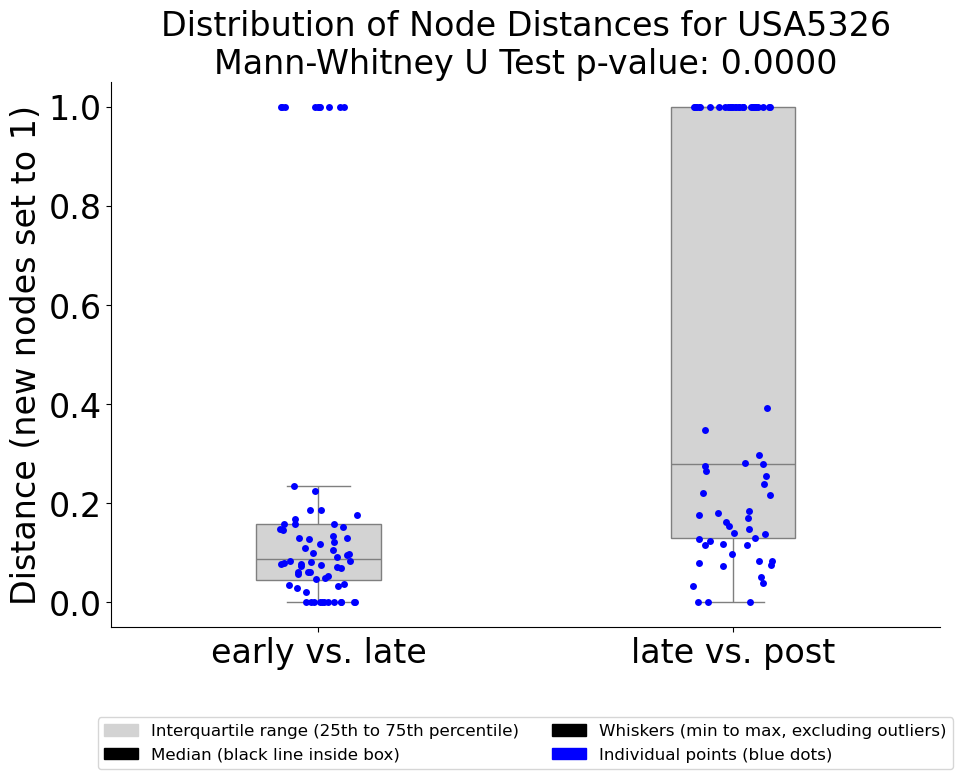

Mann-Whitney U test p-value: 2.3061907919555625e-07


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import mannwhitneyu

# Assuming the DataFrame 'distance_df' is already created as shown before

# Extracting the animal ID from the first part of the DataFrame key
animal_id = list(dataframes.keys())[0].split('_')[0]  # Extracts 'USA5288'

# Prepare the data for the boxplot
distance_data_melted = pd.melt(distance_df, id_vars='node_name', value_vars=['early_vs_late', 'late_vs_post'],
                               var_name='Comparison', value_name='Distance')

# Modify the xtick labels to remove underscores and add a period after 'vs'
distance_data_melted['Comparison'] = distance_data_melted['Comparison'].str.replace('_vs_', ' vs. ')

# Set figure size to (10, 8) but make the boxplots narrower
plt.figure(figsize=(10, 8))  # Keep the overall figure size

# Create the boxplot with narrower boxes by adjusting the 'width'
sns.boxplot(x='Comparison', y='Distance', data=distance_data_melted, color='#d3d3d3', fliersize=0, width=0.3)  # Boxplot with narrower width

# Add jittered scatter points to the plot
sns.stripplot(x='Comparison', y='Distance', data=distance_data_melted, color='blue', jitter=True, size=5)

# Add labels and title with increased fontsize
plt.ylabel('Distance (new nodes set to 1)', fontsize=24)

# Statistical test: Mann-Whitney U test for significant difference between the two distributions
early_vs_late = distance_data_melted[distance_data_melted['Comparison'] == 'early vs. late']['Distance']
late_vs_post = distance_data_melted[distance_data_melted['Comparison'] == 'late vs. post']['Distance']

stat, p_value = mannwhitneyu(early_vs_late, late_vs_post)

# Add the title with the p-value on a new line
plt.title(f'Distribution of Node Distances for {animal_id}\nMann-Whitney U Test p-value: {p_value:.4f}', fontsize=24)

# Customize tick label font sizes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Remove the x-axis label
plt.xlabel('')

# Remove the top and right spines (lines)
sns.despine(top=True, right=True)

# Create custom legend entries
median_patch = mpatches.Patch(color='black', label='Median (black line inside box)')
box_patch = mpatches.Patch(color='#d3d3d3', label='Interquartile range (25th to 75th percentile)')
whisker_patch = mpatches.Patch(color='black', linestyle='-', label='Whiskers (min to max, excluding outliers)')
outliers_patch = mpatches.Patch(color='blue', label='Individual points (blue dots)')

# Add the custom legend, placing it below the x-axis
plt.legend(handles=[box_patch, median_patch, whisker_patch, outliers_patch], fontsize=12, loc='upper center',
           bbox_to_anchor=(0.5, -0.15), ncol=2)  # Legend positioned below the plot

# Show the plot
plt.tight_layout()
plt.show()

# Print the p-value for reference
print(f"Mann-Whitney U test p-value: {p_value}")
